<a href="https://colab.research.google.com/github/m4a1carbin4/2022-ML_Term-project/blob/main/Colaborate_Matrix_Factorization(with_EM_Clustering)_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab as pl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rating_data = pd.read_csv('drive/MyDrive/ratings.csv')
movie_data = pd.read_csv('drive/MyDrive/movies.csv')

user_movie_ratings = rating_data.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

user_movie_ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_movie_ratings.columns

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            161084, 161155, 161594, 161830, 161918, 161944, 162376, 162542,
            162672, 163949],
           dtype='int64', name='movieId', length=9066)

In [ ]:
from sklearn import metrics

def silhouette_score(estimator, X):
    clusters = estimator.fit_predict(X)
    score = metrics.silhouette_score(X, clusters)
    return score

In [ ]:
## EM Clustering

Nc = range(2, 20)
em = [GaussianMixture(n_components=i) for i in Nc]

silhouette = [silhouette_score(em[i], user_movie_ratings) for i in range(len(em))]
score = [em[i].fit(user_movie_ratings).score(user_movie_ratings) for i in range(len(em))]

print("silhoutte_score: ", silhouette)

pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


In [ ]:
em = GaussianMixture(n_components=3)
em.fit(user_movie_ratings)
rating_labels = em.predict(user_movie_ratings)

In [ ]:

clustered_user_ratings = user_movie_ratings.copy()
clustered_user_ratings["cluster"] = rating_labels
print(clustered_user_ratings['cluster'].unique())
clustered_user_ratings

[1 0 2]


movieId,1,2,3,4,5,6,7,8,9,10,...,161155,161594,161830,161918,161944,162376,162542,162672,163949,cluster
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
def _make_df_to_csv(raw_df,preprocessed_df): 
    # k : k로 클러스터링 된 Data
    for k in range(0,3):
        idx = preprocessed_df[preprocessed_df['cluster']==k].index - 1
        print(idx)
        raw_df.iloc[idx].to_csv(f"./{k}th_EM-Cluster.csv")

In [ ]:
_make_df_to_csv(user_movie_ratings, clustered_user_ratings)

Int64Index([  3,   7,  16,  18,  21,  25,  33,  47,  55,  56,
            ...
            597, 604, 606, 607, 614, 626, 647, 663, 664, 670],
           dtype='int64', name='userId', length=128)
Int64Index([  0,   1,   2,   4,   5,   6,   8,   9,  10,  11,
            ...
            658, 659, 660, 661, 662, 665, 666, 667, 668, 669],
           dtype='int64', name='userId', length=519)
Int64Index([ 14,  22,  29,  72, 101, 118, 211, 231, 241, 293, 305, 310, 357,
            387, 451, 467, 471, 508, 517, 546, 563, 579, 623, 653],
           dtype='int64', name='userId')


YellowbrickTypeError: ignored

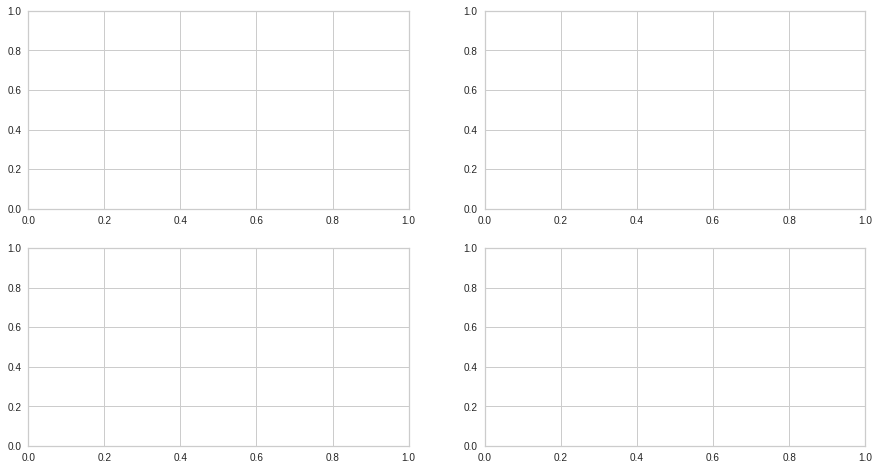

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    em = GaussianMixture(n_components=i)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(em, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(user_movie_ratings)

In [ ]:
cluster_movie_ratings = pd.read_csv("0th_EM-Cluster.csv")
cluster_movie_ratings

,userId,1,2,3,4,5,6,7,8,9,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573,668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575,670,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
matrix = cluster_movie_ratings.drop(columns = ['userId']).to_numpy()
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Base code : https://yamalab.tistory.com/92
class MatrixFactorization():
    def __init__(self, R, k, learning_rate, reg_param, epochs, verbose=False):
        """
        :param R: 전체 원본 레이팅 매트릭스 (사용자 X 아이템 리뷰점수 테이블)
        :param k: 잠재벡터 파라미터 (사실상 얼마만큼의 데이터 즉 데이터 차원수를 사용하는가에 대한 파라미터)
        :param learning_rate: 학습률
        :param reg_param: 가중치의 정규화 값
        :param epochs: 학습 횟수
        :param verbose: 상태출력
        """
        self._R = R
        self._num_users, self._num_items = R.shape
        self._k = k
        self._learning_rate = learning_rate
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose


    def fit(self):
        """
        training Matrix Factorization : Update matrix latent weight and bias

        참고: self._b에 대한 설명
        - global bias: input R에서 평가가 매겨진 rating의 평균값을 global bias로 사용
        - 정규화 기능. 최종 rating에 음수가 들어가는 것 대신 latent feature에 음수가 포함되도록 해줌.

        :return: training_process
        """

        # init latent features
        self._User_Latent = np.random.normal(size=(self._num_users, self._k))
        self._Item_Latent = np.random.normal(size=(self._num_items, self._k))

        # init biases
        self._b_User_Latent = np.zeros(self._num_users)
        self._b_Item_Latent = np.zeros(self._num_items)
        self._b = np.mean(self._R[np.where(self._R != 0)])

        # train while epochs : 설정된 횟수만큼 반복 학습.
        self._training_process = []
        for epoch in range(self._epochs):
            # rating이 존재하는 index를 기준으로 training
            X_index, Y_index = self._R.nonzero()
            for x, y in zip(X_index, Y_index):
                self.gradient_descent(x, y, self._R[x, y])
            cost = self.cost()
            self._training_process.append((epoch, cost))

            # print status
            if self._verbose == True and ((epoch + 1) % 5 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self):
        """
        compute root mean square error
        :return: rmse cost
        """

        # Nx_index, Ny_index: R[Nx_index, Ny_index]는 nonzero인 value를 의미한다.
        # 참고: http://codepractice.tistory.com/90
        Nx_index, Ny_index = self._R.nonzero()
        # predicted = self.get_complete_matrix()
        cost = 0
        for Nx, Ny in zip(Nx_index,Ny_index):
            cost += pow(self._R[Nx, Ny] - self.get_prediction(Nx, Ny), 2)
        return np.sqrt(cost/len(Nx_index))


    def gradient(self, error, x, y):
        """
        gradient of latent feature for GD

        :param error: rating - prediction error
        :param i: user index
        :param j: item index
        :return: gradient of latent feature tuple
        """

        dp = (error * self._Item_Latent[y, :]) - (self._reg_param * self._User_Latent[x, :])
        dq = (error * self._User_Latent[x, :]) - (self._reg_param * self._Item_Latent[y, :])
        return dp, dq


    def gradient_descent(self, x, y, rating):
        """
        graident descent function

        :param x: user index of matrix
        :param y: item index of matrix
        :param rating: rating of (x,y)
        """

        # get error
        prediction = self.get_prediction(x, y)
        error = rating - prediction

        # update biases
        self._b_User_Latent[x] += self._learning_rate * (error - self._reg_param * self._b_User_Latent[x])
        self._b_Item_Latent[y] += self._learning_rate * (error - self._reg_param * self._b_Item_Latent[y])

        # update latent feature
        dp, dq = self.gradient(error, x, y)
        self._User_Latent[x, :] += self._learning_rate * dp
        self._Item_Latent[y, :] += self._learning_rate * dq


    def get_prediction(self, x, y):
        """
        get predicted rating: user_x, item_y
        :return: prediction of R_xy
        """
        # 전체평균 + User 평균 평점 + item 평균 평점 + User latent X item latent 로 계산된 평점 -> 분산 제거 목적.
        return self._b + self._b_User_Latent[x] + self._b_Item_Latent[y] + self._User_Latent[x, :].dot(self._Item_Latent[y, :].T)


    def get_complete_matrix(self):
        """
        computer complete matrix PXQ + P.bias + Q.bias + global bias

        - PXQ 행렬에 b_P[:, np.newaxis]를 더하는 것은 각 열마다 bias를 더해주는 것
        - b_Q[np.newaxis:, ]를 더하는 것은 각 행마다 bias를 더해주는 것
        - b를 더하는 것은 각 element마다 bias를 더해주는 것

        - newaxis: 차원을 추가해줌. 1차원인 Latent들로 2차원의 R에 행/열 단위 연산을 해주기위해 차원을 추가하는 것.

        :return: complete matrix R^
        """
        return self._b + self._b_User_Latent[:, np.newaxis] + self._b_Item_Latent[np.newaxis:, ] + self._User_Latent.dot(self._Item_Latent.T)


In [ ]:
factorizer = MatrixFactorization(matrix, k=100, learning_rate=0.01, reg_param=0.01, epochs=100, verbose=True)
factorizer.fit()

Iteration: 5 ; cost = 0.5737
Iteration: 10 ; cost = 0.4106
Iteration: 15 ; cost = 0.3514
Iteration: 20 ; cost = 0.3085
Iteration: 25 ; cost = 0.2746
Iteration: 30 ; cost = 0.2471
Iteration: 35 ; cost = 0.2245
Iteration: 40 ; cost = 0.2056
Iteration: 45 ; cost = 0.1897
Iteration: 50 ; cost = 0.1763
Iteration: 55 ; cost = 0.1648
Iteration: 60 ; cost = 0.1549
Iteration: 65 ; cost = 0.1464
Iteration: 70 ; cost = 0.1390
Iteration: 75 ; cost = 0.1325
Iteration: 80 ; cost = 0.1267
Iteration: 85 ; cost = 0.1217
Iteration: 90 ; cost = 0.1172
Iteration: 95 ; cost = 0.1132
Iteration: 100 ; cost = 0.1096


In [ ]:
result = factorizer.get_complete_matrix()

In [ ]:
df = pd.DataFrame(result,columns= user_movie_ratings.columns)

In [ ]:
df.columns.name="movieId"

In [ ]:
df.columns

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            161084, 161155, 161594, 161830, 161918, 161944, 162376, 162542,
            162672, 163949],
           dtype='int64', name='movieId', length=9066)

In [ ]:
df

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,2.249066,2.768336,3.743917,2.875001,8.701184,5.128837,-0.194308,9.577769,-6.182695,1.573754,...,1.636745,-2.052076,8.916197,3.990222,-8.668802,-1.020139,2.685743,8.980335,-2.952166,-6.155878
1,3.731208,2.682402,4.688091,5.251704,5.449943,2.496584,2.434293,5.246218,-1.519407,3.838028,...,4.360985,1.678100,6.887406,7.021397,-1.190664,5.717755,0.870604,6.983856,4.243483,3.694385
2,1.855908,2.642912,5.072354,5.564077,5.677357,2.955642,-1.830227,11.146081,2.648638,3.625245,...,9.395256,4.426143,9.818555,-4.050376,3.313167,10.089828,5.033989,2.062710,2.968739,-3.203365
3,3.298677,3.760985,3.879393,3.764725,2.617583,3.426554,6.205512,2.113367,1.334844,4.277043,...,6.225216,10.613730,6.106861,3.611385,3.646173,4.070417,-4.879921,4.262829,3.058535,7.271574
4,3.592095,4.377110,5.498944,2.894871,4.112245,3.212654,1.830602,1.402753,2.565808,3.938993,...,0.493173,-0.774957,10.938629,12.144305,10.777185,1.381192,3.262655,4.955903,6.944269,6.293315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2.261021,2.888741,-1.271246,5.626751,0.549395,3.954905,7.402470,7.555712,4.664240,3.944301,...,7.501091,4.999180,5.108538,0.494014,5.534130,4.795348,2.836602,-3.952441,3.810658,1.193851
573,3.952542,4.312143,7.404047,10.380955,8.346345,5.126012,6.719174,-0.294981,3.522492,4.799580,...,14.078379,21.958671,14.921490,13.870620,11.991899,20.881238,4.949037,7.516697,-5.678565,12.344346
574,4.469728,4.586008,4.677411,2.789286,4.172302,3.029754,2.856759,-6.801455,0.987239,4.037983,...,8.920716,3.590999,4.517164,7.397675,4.200462,1.552501,4.860801,7.913925,-9.319951,7.976338
575,3.993852,3.766879,3.794686,-2.645424,4.032290,0.990176,5.443687,5.216930,4.317839,5.971064,...,14.476506,-4.335435,-3.329362,14.288060,9.750269,-2.100124,-0.403443,5.866775,5.857800,5.611661


In [ ]:
def recommend_movies(df_svd_preds, user_id, origin_user_id, ori_movies_df, ori_ratings_df, num_recommendations=5):
    
    #현재는 index로 적용이 되어있으므로 user_id - 1을 해야함.
    user_row_number = user_id 
    
    # 최종적으로 만든 pred_df에서 사용자 index에 따라 영화 데이터 정렬 -> 영화 평점이 높은 순으로 정렬 됌
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)
    
    # 원본 평점 데이터에서 user id에 해당하는 데이터를 뽑아낸다. 
    user_data = ori_ratings_df[ori_ratings_df.userId == origin_user_id]
    
    # 위에서 뽑은 user_data와 원본 영화 데이터를 합친다. 
    user_history = user_data.merge(ori_movies_df, on = 'movieId').sort_values(['rating'], ascending=False)
    
    # 원본 영화 데이터에서 사용자가 본 영화 데이터를 제외한 데이터를 추출
    recommendations = ori_movies_df[~ori_movies_df['movieId'].isin(user_history['movieId'])]

    # 사용자의 영화 평점이 높은 순으로 정렬된 데이터와 위 recommendations을 합친다. 
    recommendations = recommendations.merge( pd.DataFrame(sorted_user_predictions).reset_index(), on = 'movieId')
    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]
                      
    return user_history, recommendations

In [ ]:
def checkId_recommend_movies(df_svd_preds, user_id, ori_movies_df, ori_ratings_df, num_recommendations=5):
  id_list = cluster_movie_ratings[['userId']]
  tmp_id = id_list.index[id_list['userId'] == 330].tolist()
  if(len(tmp_id) == 0):
    print('user is not in this cluster')
    return 0,0
  tmp_id = tmp_id[0]

  already_rated, predictions = recommend_movies(df,tmp_id,user_id, movie_data, rating_data, 10)

  return already_rated, predictions

In [ ]:
already_rated, predictions = checkId_recommend_movies(df,330, movie_data, rating_data, 10)
already_rated.head(10)

,userId,movieId,rating,timestamp,title,genres
47,330,1094,5.0,948577200,"Crying Game, The (1992)",Drama|Romance|Thriller
14,330,213,5.0,948577039,Burnt by the Sun (Utomlyonnye solntsem) (1994),Drama
34,330,527,5.0,948577164,Schindler's List (1993),Drama|War
45,330,1035,5.0,948574126,"Sound of Music, The (1965)",Musical|Romance
48,330,1172,5.0,948575236,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
53,330,1249,5.0,948576522,"Femme Nikita, La (Nikita) (1990)",Action|Crime|Romance|Thriller
27,330,373,5.0,948576522,Red Rock West (1992),Thriller
58,330,1428,5.0,948731410,Angel Baby (1995),Drama
61,330,1575,5.0,948577442,Gabbeh (1996),Drama
67,330,1683,5.0,948578017,"Wings of the Dove, The (1997)",Drama|Romance


In [ ]:
predictions

,movieId,title,genres,Predictions
4474,6306,I Am Trying to Break Your Heart (2002),Documentary,14.074279
5086,7613,White Palace (1990),Drama,12.783705
4693,6770,My Life Without Me (2003),Drama|Romance,12.670925
7747,89045,Rocky VI (1986),Comedy,12.517213
309,372,Reality Bites (1994),Comedy|Drama|Romance,12.350130
7080,67788,Confessions of a Shopaholic (2009),Comedy|Romance,12.285109
5877,30783,Blood and Black Lace (Sei donne per l'assassin...,Horror|Thriller,12.252141
6408,48082,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,12.082993
4505,6369,Friends and Family (2001),Comedy,12.043405
6943,62511,"Synecdoche, New York (2008)",Comedy|Drama,11.929439
